In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from datetime import datetime
import pickle
from matplotlib import rcParams
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from seaborn import boxplot, scatterplot
from sklearn.linear_model import LinearRegression as LR
from IPython.core.display import HTML, display

ImportError: cannot import name 'scatterplot'

In [2]:
%matplotlib inline

# Global graphics setup
display(HTML("<style>.container {width: 90%}</style>"))
plot_colors = {'swf': '#000000',
               'aqua': '#348ABD',
               'aqua2': '#8000FF',
               'viirs': '#A60628',
               'mei': '#467821',
               }
rcParams['axes.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['font.size'] = 15
rcParams['ytick.major.size'] = 8
rcParams['ytick.minor.size'] = 3
rcParams['xtick.major.size'] = 8
rcParams['xtick.minor.size'] = 3
rcParams['xtick.top'] = True
rcParams['ytick.direction'] = 'in'
rcParams['xtick.direction'] = 'in'
rcParams['text.usetex'] = False
rcParams['font.family'] = 'serif'
rcParams['axes.formatter.limits'] = (-2, 3)

NameError: name 'HTML' is not defined

In [4]:
rcParams['xtick.alignment'] = 'right'

ValueError: Key xtick.alignment: Unrecognized alignment string 'right': valid strings are ['center', 'top', 'bottom', 'baseline', 'center_baseline']

In [3]:
def val_to_perc(val, mean):
    return (val - mean) / mean * 100


def val_anom_to_perc(val, mean):
    return val / mean * 100
    

def set_time_axis(ax):
    x_minorlocator = mdates.YearLocator()
    x_majorformatter = mdates.DateFormatter('%b\n%Y')
    ax.xaxis.set_minor_locator(x_minorlocator)
    ax.xaxis.set_tick_params(rotation=0, horizontalalignment=)
    ax.xaxis.set_major_formatter(x_majorformatter)
    ax.set_xlabel('')


def make_ax_1(ax_c, df_, ylims=None, ls='-', **kwargs):
    
    lbl = kwargs.pop('lbl', 'phyto_C_mean')
    use95ci = kwargs.pop('use95ci', False)
    use50ci = kwargs.pop('use50ci', False)
    mean_val = kwargs.pop('mean_val', df_[lbl].mean())
    ylabel = kwargs.pop('ylabel', lbl)
    ylabel2 = kwargs.pop('ylabel2', lbl)
    use_sensor = kwargs.pop('use_sensor', True)
    
    df_.plot(y=lbl, marker='+', linestyle=ls, ax=ax_c, color='k',
                legend=False)
    if use_sensor:
        df_.loc[df_.sensor=='swf', :].plot(y=lbl, marker='+', linestyle=ls,
                                          ax=ax_c, color='blue',
                                          legend=False)
        df_.loc[df_.sensor=='both', :].plot(y=lbl, marker='+', linestyle=ls,
                                         ax=ax_c, color='k', legend=False)
        df_.loc[df_.sensor=='aqua', :].plot(y=lbl, marker='+', linestyle=ls,
                                           ax=ax_c, color='red',
                                           legend=False)
    
    ax_c.set_ylabel(ylabel)
    if ylims:
        ax_c.set_ylim(ylims)
    else:
        ylims = ax_c.get_ylim()
    if use95ci:
        cols95ci = df_.filter(regex=use95ci, axis=1).columns.tolist()
        ax_c.fill_between(df_.index, df_[cols95ci[1]], df_[cols95ci[0]],
                          color='k', alpha=0.5)
    if use50ci:
        cols50ci = df_.filter(regex=use50ci, axis=1).columns.tolist()
        ax_c.fill_between(df_.index, df_[cols50ci[1]], df_[cols50ci[0]],
                          color='k', alpha=0.7)
        
    ax_c.axhline(mean_val, color='k')
    ax_p = ax_c.twinx()
    ax_p.set_ylabel(ylabel2)
    ax_p.set_ylim(val_to_perc(ylims[0], mean=mean_val),
              val_to_perc(ylims[1], mean=mean_val)
             )
    ax_c.grid(axis='x', linestyle='--', linewidth=2)
    set_time_axis(ax_c)

    
def make_ax_2(ax, df_, ls='-', ylims=None, lbl='phyto_C_anomaly', **kwargs):
    use_sensor = kwargs.pop('use_sensor', True)
    
    df_.plot(y=lbl, marker='+', linestyle=ls, ax=ax, color='k',
                legend=False)
    if use_sensor:
        df_.loc[df_.sensor=='swf', :].plot(y=lbl, marker='+', linestyle=ls,
                                          ax=ax, color='blue',
                                          legend=False)
        df_.loc[df_.sensor=='both', :].plot(y=lbl, marker='+', linestyle=ls,
                                         ax=ax, color='k', legend=False)
        df_.loc[df_.sensor=='aqua', :].plot(y=lbl, marker='+', linestyle=ls,
                                           ax=ax, color='red',
                                           legend=False)
    #if use_mei:
    #    df_mei.plot(y='MEI', marker='D', ax=ax,
    #                color=plot_colors['mei'], linestyle='', legend=False)
    mean_val = kwargs.pop('mean_val', df_[lbl].mean())
    ylabel = kwargs.pop('ylabel', lbl)
    ylabel2 = kwargs.pop('ylabel2', lbl + 'anomaly (\%)')
    ax.axhline(linestyle='-', linewidth=1.5, color='k')
    ax.grid(axis='x', linestyle='--', linewidth=2)
    ax.set_ylabel(ylabel) 
    if ylims:
        ax.set_ylim(ylims)
    else:
        ylims = ax.get_ylim()
    if mean_val:
        ax2 = ax.twinx()
        ax2.set_ylabel(ylabel2)
        ax2.set_ylim(val_anom_to_perc(ylims[0], mean=mean_val),
                     val_anom_to_perc(ylims[1], mean=mean_val))
    set_time_axis(ax)
    ax.set_xlabel('')

In [4]:
regions = ['eqpso', 'nhpso', 'shpso']
prods = ['chlor_a', 'bbp_443_giop']

In [5]:
with open('../PklJar/dct_df.pkl', 'rb') as f:
    dct_df = pickle.load(f)

In [6]:
with open('../PklJar/dct_df_test.pkl', 'rb') as f:
    dct_df_test = pickle.load(f)

In [7]:
df_mei = pd.read_pickle('../PklJar/dfMEI.pkl')

In [8]:
df_mei = df_mei.resample('MS', loffset=pd.Timedelta(14, 'd')).first()

In [9]:
dct_final = {reg:dict.fromkeys(prods) for reg in regions}

In [10]:
for reg in regions:
    dct_final[reg]['chlor_a'] = dct_df[reg]['chlor_a']
    dct_final[reg]['bbp_443_giop'] = dct_df_test[reg]['bbp_443_giop']
    #dct_df[reg]['bbp_443_giop'] = dct_df_test[reg]['bbp_443_giop']

In [15]:
df_ = df_.merge(df_mei, left_index=True, right_index=True)

In [18]:
idx = df_.MEI.index[df_.MEI.apply(np.isfinite)]

In [20]:
df_[f'{prod_mean}_scaled'] = np.NaN
df_.loc[idx, f'{prod_mean}_scaled'] = lr_mean.predict(x)
df_[f'{prod_anom}_scaled'] = np.NaN
df_.loc[idx, f'{prod_anom}_scaled'] = lr_anom.predict(x)

In [21]:
df_.sensor.value_counts()

aqua    132
both     66
swf      56
Name: sensor, dtype: int64

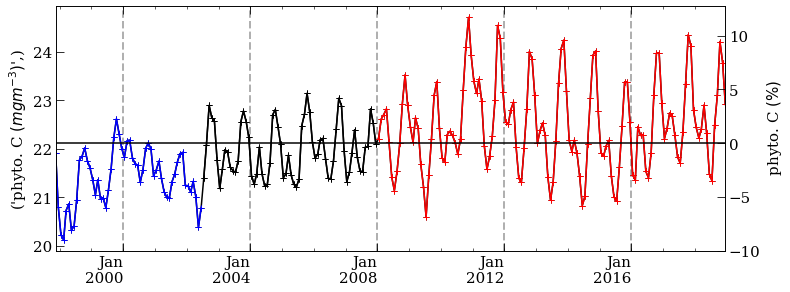

In [22]:
f, axs = pl.subplots(figsize=(12, 5))
make_ax_1(axs, df_, lbl=prod_mean,
          ylabel=ylabel1, ylabel2=ylabel2)

In [34]:
ylabel1

('phyto. C $(mg m^{-3})$',)

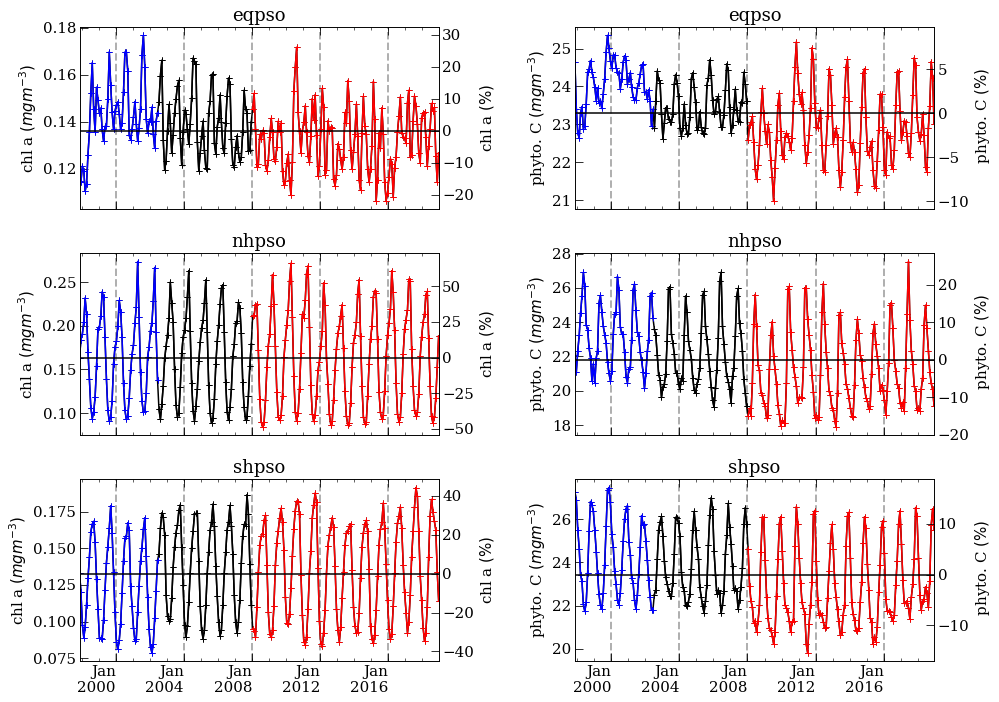

In [15]:
f, axs = pl.subplots(ncols=2, nrows=3, figsize=(14, 10))
for i, reg in enumerate(regions):
    for j, prod in enumerate(prods):
        df_ = dct_df[reg][prod]['df_all']
        #df_ = df_.merge(df_mei, left_index=True, right_index=True)
        #x = df_.dropna().MEI.values.reshape(-1, 1)
        #y_mean = df_.dropna()[prod_mean].values.reshape(-1, 1)
        #y_anom = df_.dropna()[prod_anom].values.reshape(-1, 1)
        #lr_mean.fit(x, y_mean)
        #lr_anom.fit(x, y_anom)
        if 'bbp' in prod:
            prod_mean = 'phyto_C_mean'
            prod_anom = 'phyto_C_anomaly' 
            ylabel1=r'phyto. C $(mg m^{-3})$'
            ylabel2=r' phyto. C $(\%)$'
        else:
            prod_mean = 'chlor_a_adj_mean'
            prod_anom = 'chlor_a_anomaly'
            ylabel1=r'chl a $(mg m^{-3})$'
            ylabel2=r'chl a $(\%)$'
        make_ax_1(axs[i, j], df_, lbl=prod_mean,
                 ylabel=ylabel1, ylabel2=ylabel2)
        axs[i,j].set_title(reg)
#pl.subplots_adjust(hspace=0.01)
f.tight_layout()
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
f.savefig('../FigJar/regional_ts_%s.pdf' % dt_now, dpi=300, format='pdf')

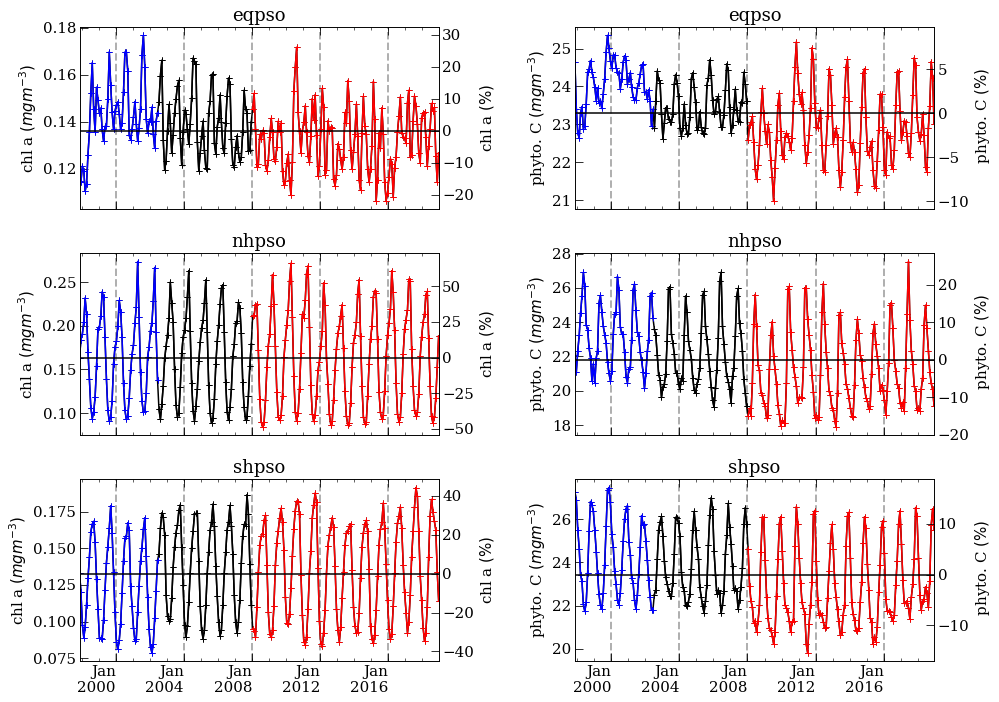

In [11]:
f, axs = pl.subplots(ncols=2, nrows=3, figsize=(14, 10))
for i, reg in enumerate(regions):
    for j, prod in enumerate(prods):
        df_ = dct_final[reg][prod]['df_all']
        if 'bbp' in prod:
            prod_mean = 'phyto_C_mean'
            prod_anom = 'phyto_C_anomaly' 
            ylabel1=r'phyto. C $(mg m^{-3})$'
            ylabel2=r' phyto. C $(\%)$'
        else:
            prod_mean = 'chlor_a_adj_mean'
            prod_anom = 'chlor_a_anomaly'
            ylabel1=r'chl a $(mg m^{-3})$'
            ylabel2=r'chl a $(\%)$'
        make_ax_1(axs[i, j], df_, lbl=prod_mean,
                 ylabel=ylabel1, ylabel2=ylabel2)
        axs[i,j].set_title(reg)
#pl.subplots_adjust(hspace=0.01)
f.tight_layout()
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
#f.savefig('../FigJar/regional_ts_%s.pdf' % dt_now, dpi=300, format='pdf')

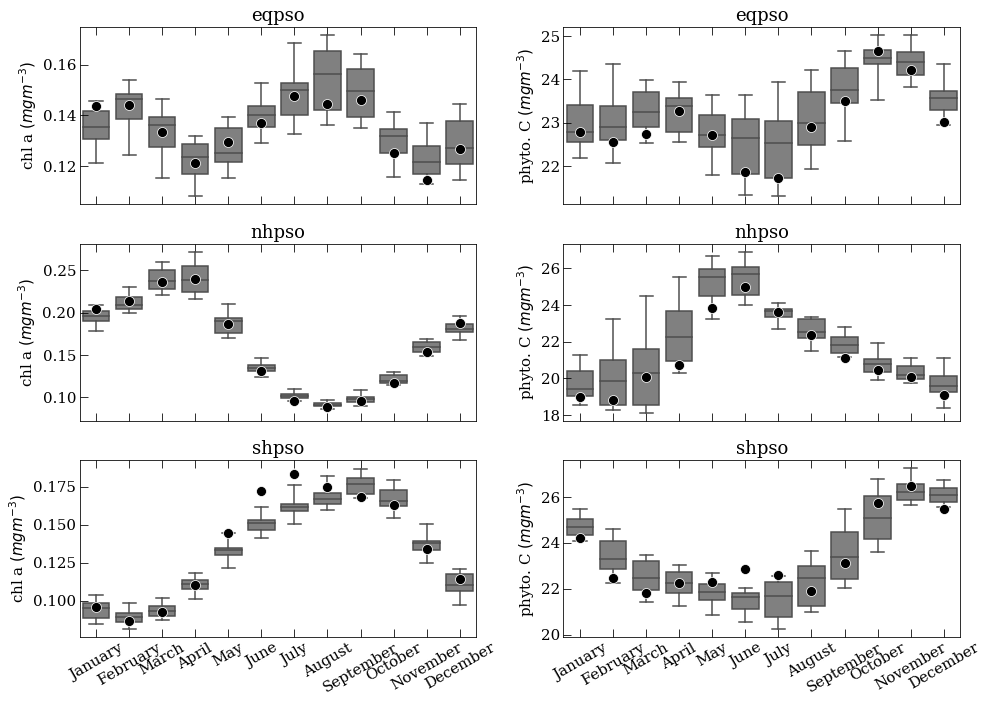

In [16]:
f, axs = pl.subplots(ncols=2, nrows=3, figsize=(14, 10), sharex=True)
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']
for i, reg in enumerate(regions):
    for j, prod in enumerate(prods):
        df_ = dct_df[reg][prod]['df_all']
        if 'Month' not in df_.columns.tolist():
            df_.insert(0, 'Month', df_.index.month_name())
        #df_ = df_.merge(df_mei, left_index=True, right_index=True)
        #x = df_.dropna().MEI.values.reshape(-1, 1)
        #y_mean = df_.dropna()[prod_mean].values.reshape(-1, 1)
        #y_anom = df_.dropna()[prod_anom].values.reshape(-1, 1)
        #lr_mean.fit(x, y_mean)
        #lr_anom.fit(x, y_anom)
        if 'bbp' in prod:
            prod_mean = 'phyto_C_mean'
            prod_anom = 'phyto_C_anomaly' 
            ylabel1=r'phyto. C $(mg m^{-3})$'
            ylabel2=r' phyto. C $(\%)$'
        else:
            prod_mean = 'chlor_a_adj_mean'
            prod_anom = 'chlor_a_anomaly'
            ylabel1=r'chl a $(mg m^{-3})$'
            ylabel2=r'chl a $(\%)$'
        
        boxplot(x='Month', y=prod_mean, data=df_.loc[:'2017-12-15'],
                     ax=axs[i, j], color='gray',
                     showfliers=False, whis=[5, 95], order=ordered_months)
        scatterplot(x='Month', y=prod_mean, data=df_.loc['2018-01-15':],
                    ax=axs[i,j], color='k', s=100, zorder=3)
        axs[i,j].tick_params(axis='x', rotation=30)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel(ylabel1)
        axs[i,j].set_title(reg)
f.tight_layout()
dt_now = datetime.strftime(datetime.now(), '%y%m%d_%H%M%S')
f.savefig('../FigJar/regional_boxplot_%s.pdf' %dt_now, dpi=300, format='pdf')